In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [2]:
sns.set(style="whitegrid", color_codes=True)
import itertools

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):
    """Normalization can be applied by setting normalize=true"""
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = 3*cm.max()/4
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j], horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
data = pd.read_csv("parkinsons.data", sep=',' , index_col='name')
data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
print(data.shape)

(195, 23)


<Axes: >

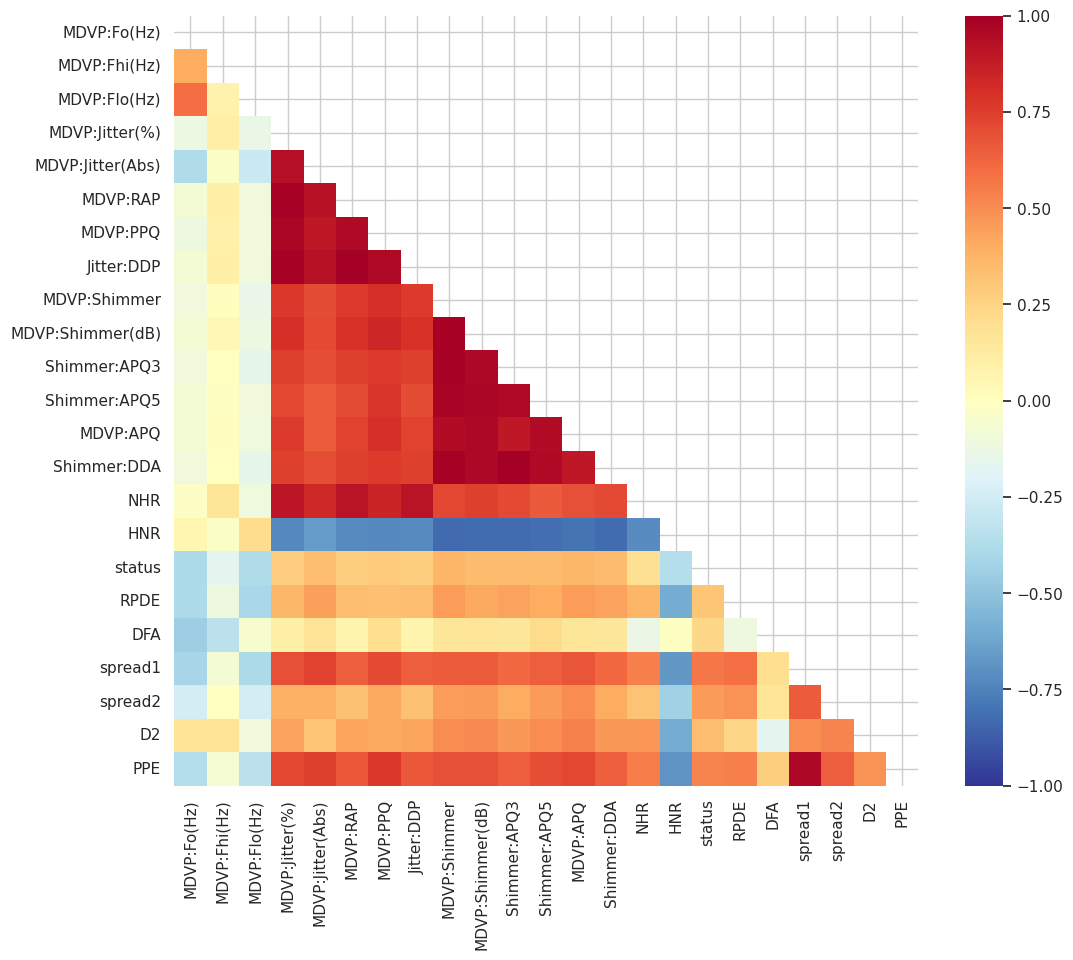

In [5]:
#Correlation Matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

sns.heatmap(data.corr(),vmin=-1, vmax=1,cmap='RdYlBu_r', mask=mask)

Text(0.5, 1.0, 'Features Correlating with Parkinson existence')

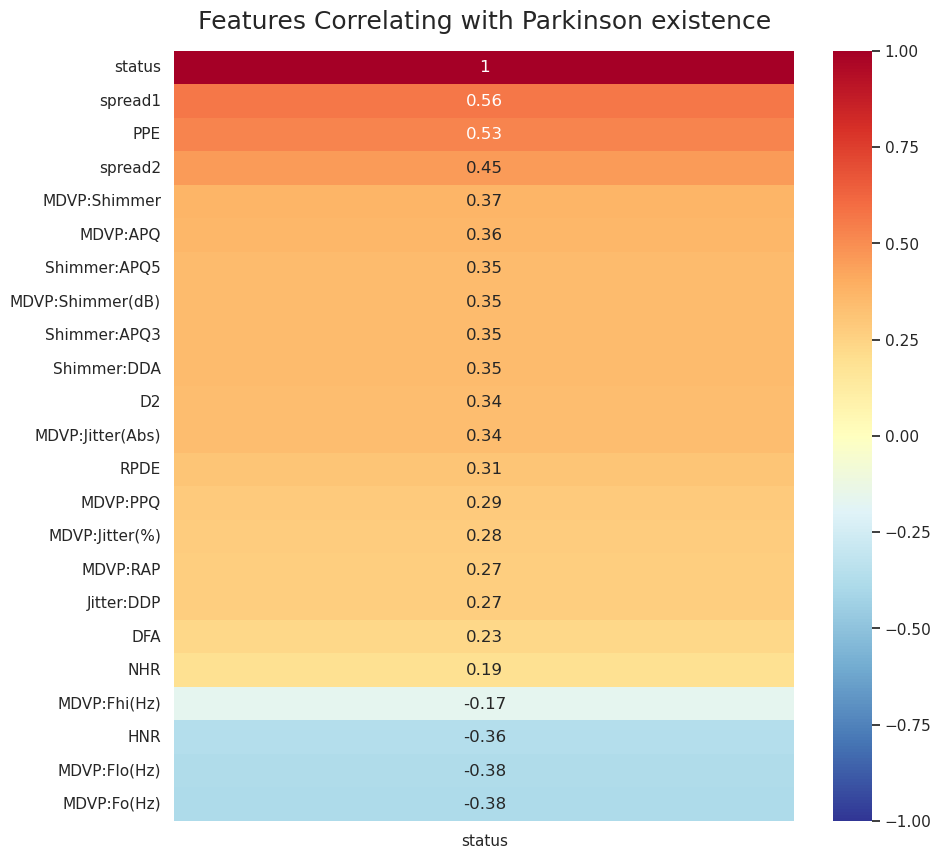

In [6]:
#Modifying the headmap plot to show correlation variables to the Status
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(data.corr()[['status']].sort_values(by='status', ascending=False), vmin=-1, vmax=1,
                     annot=True, cmap='RdYlBu_r')
heatmap.set_title('Features Correlating with Parkinson existence', fontdict={'fontsize':18}, pad=16)

In [7]:
X = data.drop('status', axis=1)
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [8]:
y = data['status']
y.head()

name
phon_R01_S01_1    1
phon_R01_S01_2    1
phon_R01_S01_3    1
phon_R01_S01_4    1
phon_R01_S01_5    1
Name: status, dtype: int64

In [9]:
y.value_counts(normalize=True)

1    0.753846
0    0.246154
Name: status, dtype: float64

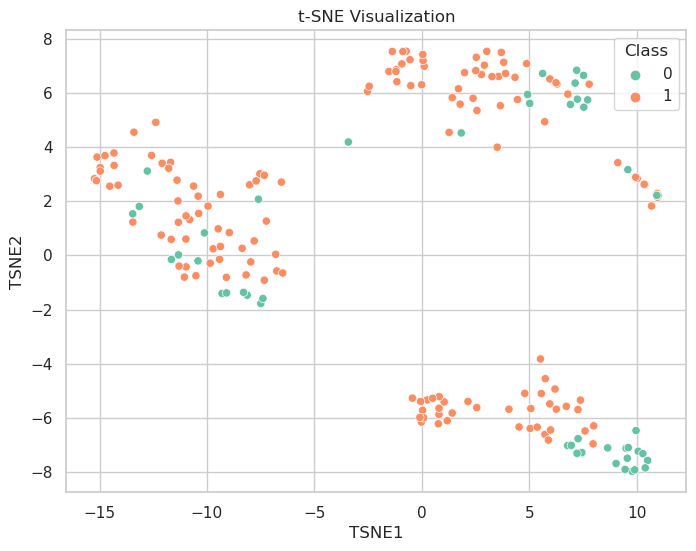

In [10]:
#T-SNE
import seaborn as sns
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,random_state=42)
X_tsne = tsne.fit_transform(X)

tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Class'] = y.values

plt.figure(figsize=(8,6))
sns.scatterplot(data=tsne_df, x = 'TSNE1', y='TSNE2', hue='Class', palette='Set2')
plt.title('t-SNE Visualization')
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=11)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (136, 22)
y_train shape:  (136,)
X_test shape:  (59, 22)
y_test shape:  (59,)


In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
y_pred = knn.predict(X_test)
y_pred[0:10]

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0])

In [15]:
knn.predict_proba(X_test)[0:10]

array([[0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Confusion matrix, without normalization
[[ 9  3]
 [ 5 42]]


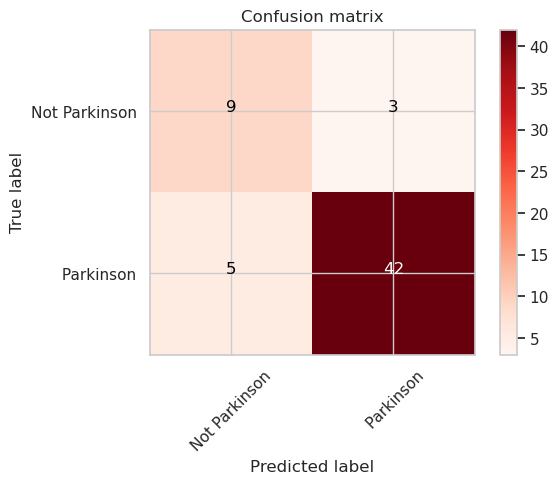

In [17]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix', cmap=plt.cm.Reds)

In [18]:
print("\nClassification Report: \n", classification_report(y_test, y_pred))
print("\nAccuracy Score: ", accuracy_score(y_test, y_pred))


Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.93      0.89      0.91        47

    accuracy                           0.86        59
   macro avg       0.79      0.82      0.80        59
weighted avg       0.87      0.86      0.87        59


Accuracy Score:  0.864406779661017


In [19]:
param_grid = {
    'n_neighbors' : [3,5,7,9],
}

In [20]:
knn = KNeighborsClassifier()

In [21]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(knn, param_grid, scoring='recall', cv=5)
grid_search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]}, scoring='recall')

In [22]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Parameters:  {'n_neighbors': 9}
Best Score:  0.97


In [23]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [24]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
recall

0.9148936170212766

In [25]:
y_hat = grid_search.best_estimator_.predict(X)

In [26]:
knn = KNeighborsClassifier()
knn.fit(X,y)

KNeighborsClassifier()

In [27]:
y_hat = knn.predict(X)

Confusion matrix, without normalization
[[ 32  16]
 [  5 142]]


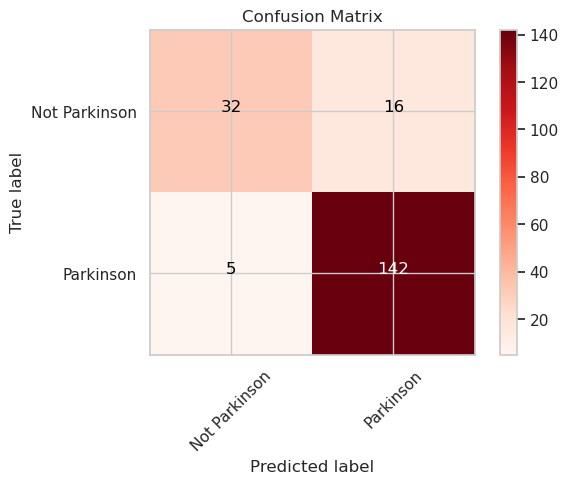

In [28]:
plot_confusion_matrix(confusion_matrix(y, y_hat), classes=["Not Parkinson", "Parkinson"],
                     title='Confusion Matrix', cmap=plt.cm.Reds)

In [29]:
#Machine learning Interpretability
tsne_df['label'] = ''
tsne_df['label'].iloc[np.where((y_hat==1)& (y==1))]="TP"
tsne_df['label'].iloc[np.where((y_hat==0)& (y==0))]="TN"
tsne_df['label'].iloc[np.where((y_hat==1)& (y==0))]="FP"
tsne_df['label'].iloc[np.where((y_hat==0)& (y==1))]="FN"

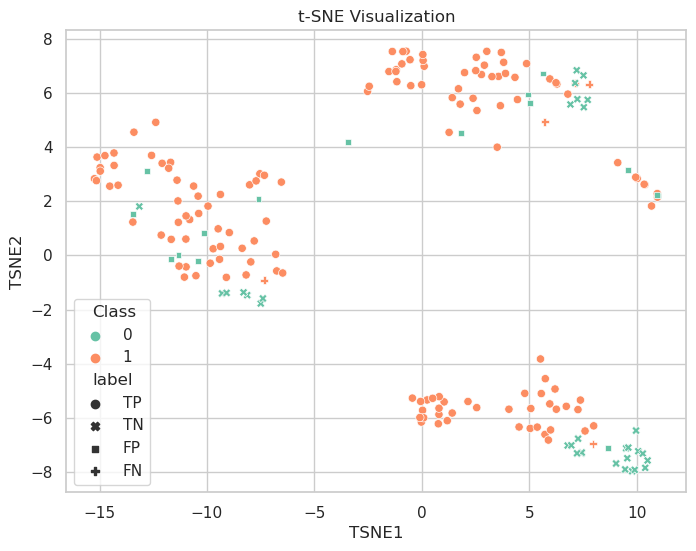

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Class', palette='Set2', style='label')
plt.title('t-SNE Visualization')
plt.show()

In [31]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [32]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred = lr.predict(X_test)
y_pred[0:10]

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0])

In [34]:
lr.predict_proba(X_test)[0:10]

array([[0.26796849, 0.73203151],
       [0.69161219, 0.30838781],
       [0.06764952, 0.93235048],
       [0.38588988, 0.61411012],
       [0.07237225, 0.92762775],
       [0.26252443, 0.73747557],
       [0.00912184, 0.99087816],
       [0.5108703 , 0.4891297 ],
       [0.85915321, 0.14084679],
       [0.90263876, 0.09736124]])

Confusion matrix, without normalization
[[ 9  3]
 [ 6 41]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.75      0.67        12
           1       0.93      0.87      0.90        47

    accuracy                           0.85        59
   macro avg       0.77      0.81      0.78        59
weighted avg       0.86      0.85      0.85        59


Accuracy Score:  0.847457627118644


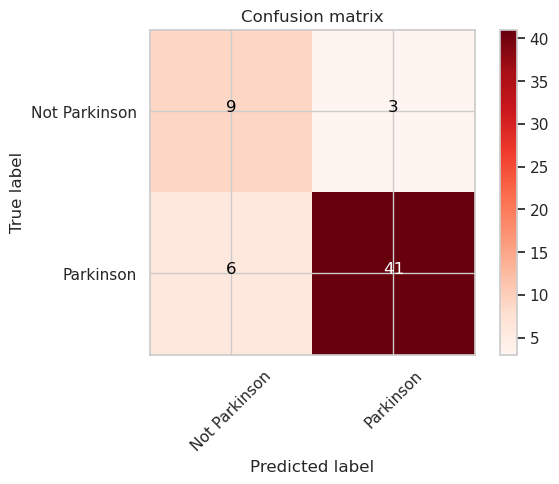

In [35]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=["Not Parkinson", "Parkinson"], title='Confusion matrix', cmap=plt.cm.Reds)
print("\nClassification Report: \n", classification_report(y_test, y_pred))
print("\nAccuracy Score: ", accuracy_score(y_test, y_pred))

In [36]:
coef=abs(lr.coef_[0])

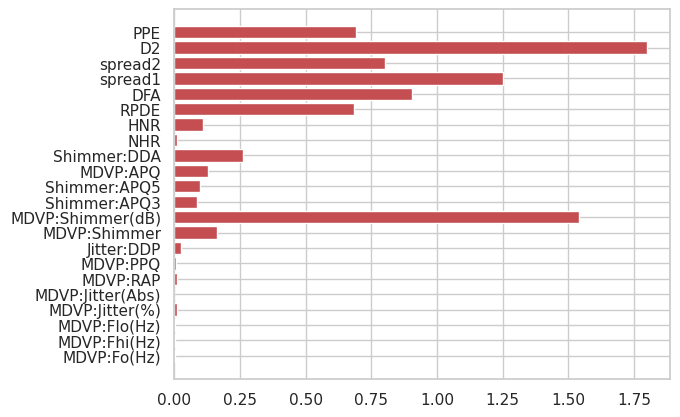

In [37]:
plt.barh(X.columns, coef, color='r')
plt.show()

In [38]:
best_columns = X.columns[np.argsort(-1*coef)[0:5]]
best_columns

Index(['D2', 'MDVP:Shimmer(dB)', 'spread1', 'DFA', 'spread2'], dtype='object')

Confusion matrix, without normalization
[[ 9  3]
 [ 6 41]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.75      0.67        12
           1       0.93      0.87      0.90        47

    accuracy                           0.85        59
   macro avg       0.77      0.81      0.78        59
weighted avg       0.86      0.85      0.85        59


Accuracy Score:  0.847457627118644


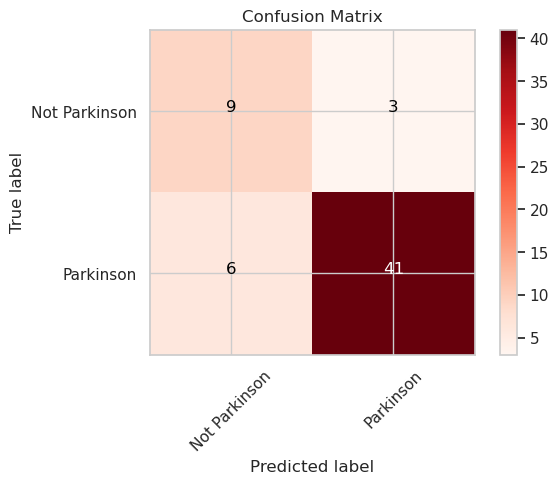

In [39]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train[best_columns], y_train)

y_pred_proba = log_reg.predict_proba(X_test[best_columns])

plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=["Not Parkinson", "Parkinson"], title='Confusion Matrix',
                     cmap=plt.cm.Reds)
print("\nClassification Report: \n", classification_report(y_test, y_pred))
print("\nAccuracy Score: ", accuracy_score(y_test, y_pred))

Confusion matrix, without normalization
[[ 4  8]
 [ 2 45]]


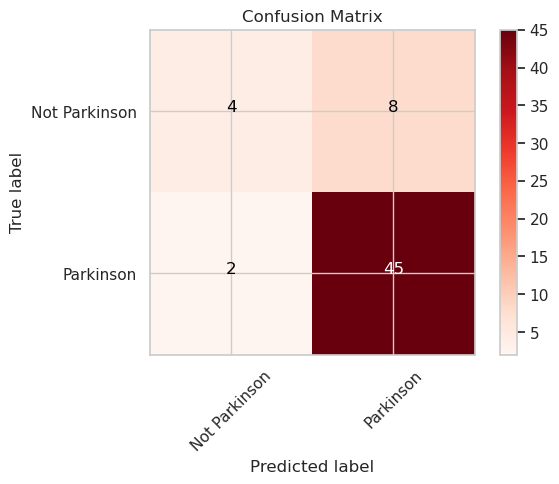

In [40]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

y_hat = svm.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_hat), classes=["Not Parkinson", "Parkinson"], title='Confusion Matrix', cmap=plt.cm.Reds)

In [41]:
param_grid = {
    'C' : [0.1, 1,],
    'gamma' : [0.1, 1, 10],
}

In [42]:
from sklearn.svm import SVC
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, scoring='recall', cv=2)
grid_search.fit(X_train, y_train)
print("Best hyperparameters: ", grid_search.best_params_)
print("Best recall score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 0.1, 'gamma': 0.1}
Best recall score:  1.0


In [43]:
# Random forest Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=123)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 89.83%


In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [50, 100,200],
    'max_depth' : [5,10,15],
    'max_features' : ['sqrt', 'log2']
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)
rf.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters:  {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}


<Axes: >

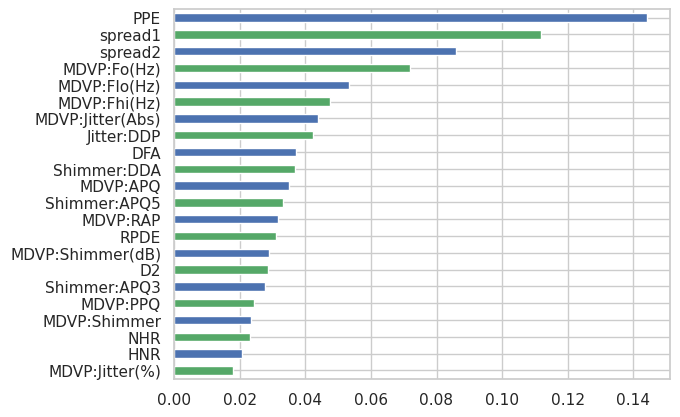

In [45]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', color=['g', 'b'])

In [46]:
# Visualizing the decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2,4],
    'min_samples_split' : [2,4],
    'min_samples_leaf' : [1,2]
 }

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(dt, param_grid, cv = 5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best recall score: ", grid_search.best_score_)

Best parameters:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 4}
Best recall score:  0.8817460317460316


In [47]:
clf = grid_search.best_estimator_
y_pred = clf.predict(X_test)

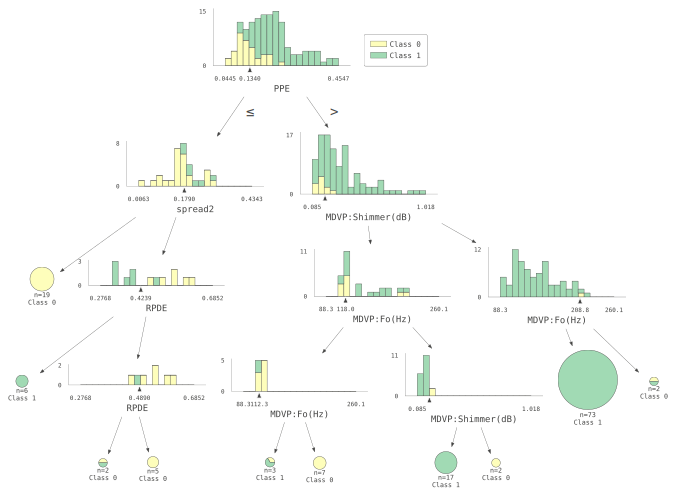

In [48]:
import dtreeviz
feature_names = list(X_train.columns)
viz_model =  dtreeviz.model(clf, X_train, y_train=y_train, feature_names=feature_names)
v = viz_model.view(fancy=True, fontname="monospace")
v

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

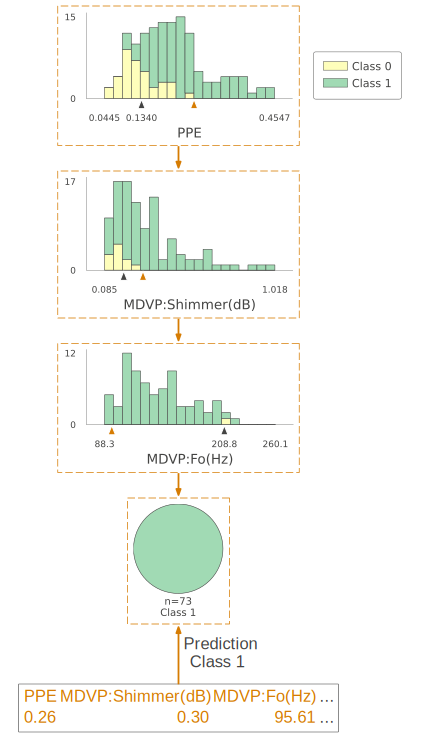

In [49]:
rand = np.random.randint(0, len(X))
sample_point = X.iloc[rand, :].values
v = viz_model.view(fancy=True, scale=1.5, x = sample_point, show_just_path = True)
v